In [2]:
include("../EuclidElements.jl");

# Book 1

## Proposition 5

In isoceles triangles the angles at the base are equal to one another, and, if the equal straight lines be produced further, the angles under the base will be equal to one another.

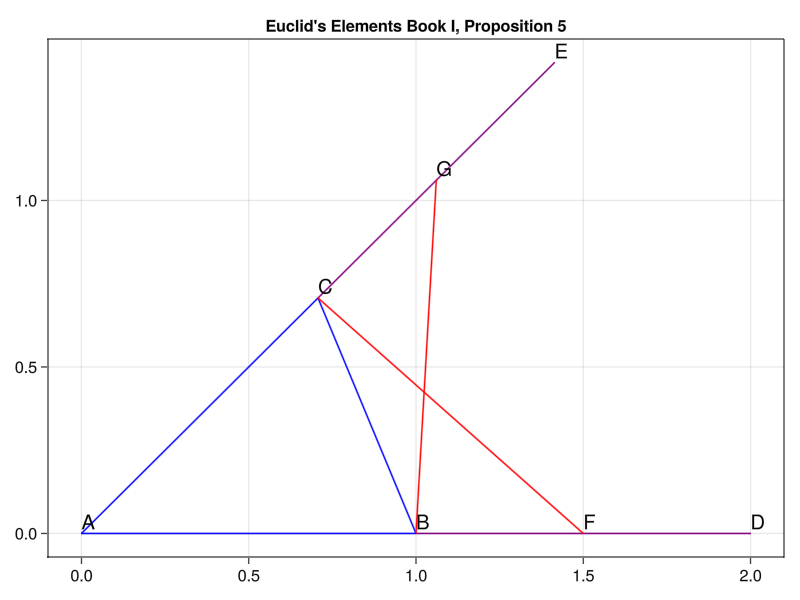

In [2]:
#ABC is isosceles, AB = AC
len_AB_0 = 1.0
len_AB = Observable(len_AB_0)
∠BAC_0 = π/4
∠BAC = Observable(∠BAC_0)
len_extend_0 = 1.0
len_extend = Observable(len_extend_0)

#Construct the triangle...
A_0 = Point2f(0,0)
A = Observable(A_0)
B_0 = Point2f(len_AB_0,0)
B = @lift(Point2f($len_AB,0))
C_0 = Point2f(len_AB_0*cos(∠BAC_0), len_AB_0*sin(∠BAC_0))
C = @lift(Point2f($len_AB*cos($∠BAC), $len_AB_0*sin($∠BAC)))

#Create BD & CE off of AB, AC
D = @lift(continue_line($A, $B, $len_extend))
E = @lift(continue_line($A, $C, $len_extend))

#Get F along BD
F = @lift(continue_line($A, $B, $len_extend/2))

#Take AG equal to AF
G = @lift(continue_line($A, $C, $len_extend/2))


#setup the chart space...
f = Figure()
ax = Axis(f[1,1], title="Euclid's Elements Book I, Proposition 5")

# Draw the lines
lines!(@lift([$A,$B]), color=:blue)
lines!(@lift([$A,$C]), color=:blue)
lines!(@lift([$B,$C]), color=:blue)
lines!(@lift([$B,$D]), color=:purple)
lines!(@lift([$C,$E]), color=:purple)
lines!(@lift([$F,$C]), color=:red)
lines!(@lift([$G,$B]), color=:red)

#Now draw the point labels
Apoint = text!(A, text="A")
Bpoint = text!(B, text="B")
Cpoint = text!(C, text="C")
Dpoint = text!(D, text="D")
Epoint = text!(E, text="E")
Fpoint = text!(F, text="F")
Gpoint = text!(G, text="G")

#Draw and show the chart :)
current_figure()

### Animation

In [3]:
#ABC is isosceles, AB = AC
len_AB_0 = 2f0
len_AB = Observable(len_AB_0)
∠BAC_0 = π/4f0
∠BAC = Observable(∠BAC_0)
len_extend_0 = 2f0
len_extend = Observable(len_extend_0)
fmod_0 = 1f0/2f0
fmod = Observable(fmod_0)

#Construct the triangle...
A_0 = Point2f(0,0)
A = Observable(A_0)
B_0 = Point2f(len_AB_0,0)
B = @lift(Point2f($len_AB,0))
C_0 = Point2f(len_AB_0*cos(∠BAC_0), len_AB_0*sin(∠BAC_0))
C = @lift(Point2f($len_AB*cos($∠BAC), $len_AB_0*sin($∠BAC)))

#Create BD & CE off of AB, AC
D = @lift(continue_line($A, $B, $len_extend))
E = @lift(continue_line($A, $C, $len_extend))

#Get F along BD
F = @lift(continue_line($A, $B, $len_extend * $fmod))

#Take AG equal to AF
G = @lift(continue_line($A, $C, $len_extend * $fmod))




#setup the chart space...
f = Figure()
ax = Axis(f[1,1], aspect=DataAspect(), title="Euclid's Elements Book I, Proposition 5")
xlims!(ax, -5,5)
ylims!(ax, -5,5)

FGα = whole_circle(A[], Float32(len_AB[] + (len_extend[] * fmod[])), 0f0, color=:pink, linewidth=5f0)

isocomp = @lift(compare_triangle($C, $B, $A, $B, $C, $A, Point2f(-2.5, 2.5), 0f0, precision=6,
                    triangle=false, cursorcolor=:pink, cursorlinewidth=1f0, color=:pink, linewidth=5f0))

bigcomp = @lift(compare_triangle($A, $B, $G, $A, $C, $F, Point2f(-2.5, -3), 0f0, precision=6,
                    cursorcolor=:pink, cursorlinewidth=1f0, color=:pink, linewidth=5f0))

lilcomp = @lift(compare_triangle($B, $C, $F, $C, $B, $G, Point2f(2, -3), 0f0, precision=6,
                    cursorcolor=:pink, cursorlinewidth=1f0, color=:pink, linewidth=5f0))

# Draw the lines
lines!(@lift([$A,$B]), color=:blue)
lines!(@lift([$A,$C]), color=:blue)
lines!(@lift([$B,$C]), color=:blue)

BD = straight_line(B_0, D[], color=:purple, linewidth=1f0)
CE = straight_line(C_0, E[], color=:purple, linewidth=1f0)

FC = straight_line(F[], C_0, color=:red, linewidth=1f0)

GB = straight_line(G[], B_0, color=:red, linewidth=1f0)

#Now draw the point labels
Apoint = text!(A, text="A")
Bpoint = text!(B, text="B")
Cpoint = text!(C, text="C")

Isoopac = Observable(0f0)
text!(Point2f(-2.5, 4.5), text="Isosceles Triangle", color=@lift(RGBA(0,0,0,$Isoopac)))

Dopac = Observable(0f0)
Dpoint = text!(D, text="D", color=@lift(RGBA(0,0,0,$Dopac)))
Eopac = Observable(0f0)
Epoint = text!(E, text="E", color=@lift(RGBA(0,0,0,$Eopac)))
Fopac = Observable(0f0)
Fpoint = text!(F, text="F", color=@lift(RGBA(0,0,0,$Fopac)))
Gopac = Observable(0f0)
Gpoint = text!(G, text="G", color=@lift(RGBA(0,0,0,$Gopac)))


# Draw the animation!
framerate = 24
d_s = 24
timestamps = range(0,8π, step=8π/(d_s*framerate))

record(f, "Euclid-I-5.gif", timestamps; framerate=framerate) do t
    # Animations come in parts
    # 1. Animate showing we have isosceles
    animate_tricompare(isocomp[], 0.25π, π, t, fade_start=1.5π, fade_end=2π)
    if t > π
        Isoopac[] = 1f0
    end

    # 2. Animate lines and circles extending the triangle
    animate_line(BD, π, 1.5π, t)
    if t > 1.5π
        Dopac[] = 1f0
        Isoopac[] = (2π-t)/(2π-1.5π)
    end
    animate_line(CE, 1.5π, 2π, t)
    if t > 2π
        Isoopac[] = 0f0
        Eopac[] = 1f0
        Fopac[] = 1f0
    end
    animate_line(FC, 2π, 2.5π, t)
    animate_circle(FGα, 2.5π, 3π, t, fade_start=3.25π, fade_end=3.5π)
    if t > 3π
        Gopac[] = 1f0
    end
    animate_line(GB, 3π, 3.5π, t)


    # 3. Finally, the ending triangle comparisons
    animate_tricompare(bigcomp[], 4π, 5π, t)
    animate_tricompare(lilcomp[], 5.5π, 6.5π, t)
end;

![animation](Euclid-I-5.gif)